In [3]:
!pip3 install opencv-python
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [4]:
print(cv2.__version__)

4.10.0


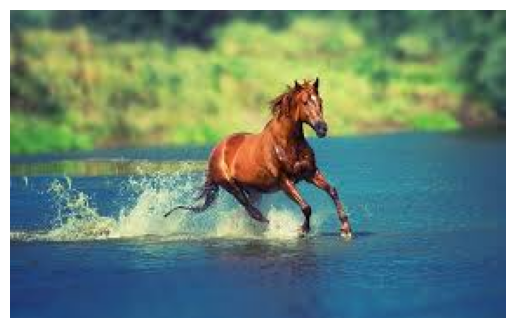

In [5]:
image = cv2.imread('/content/download (4).jfif')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

Image Size: 285 x 177 pixels


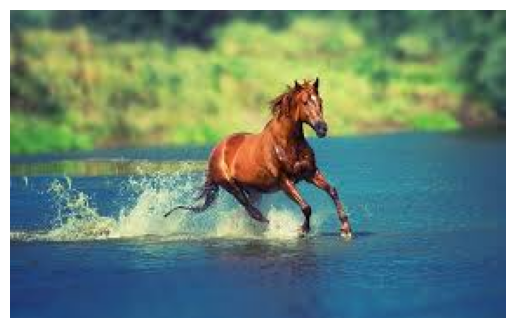

Image Size: 285 x 177 pixels


In [6]:
image = cv2.imread('/content/download (4).jfif')
height, width, _ = image.shape
print(f"Image Size: {width} x {height} pixels")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

print(f"Image Size: {width} x {height} pixels")

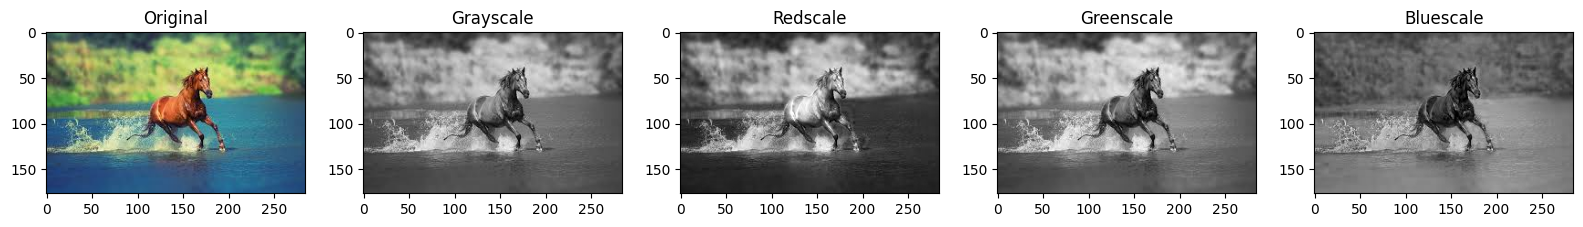

In [7]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

red_image = image[:, :, 2]
green_image = image[:, :, 1]
blue_image = image[:, :, 0]


fig, ax = plt.subplots(1, 5, figsize=(16, 8))
fig.tight_layout()

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original")

ax[1].imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
ax[1].set_title("Grayscale")

ax[2].imshow(cv2.cvtColor(red_image, cv2.COLOR_BGR2RGB))
ax[2].set_title("Redscale")

ax[3].imshow(cv2.cvtColor(green_image, cv2.COLOR_BGR2RGB))
ax[3].set_title("Greenscale")

ax[4].imshow(cv2.cvtColor(blue_image, cv2.COLOR_BGR2RGB))
ax[4].set_title("Bluescale")


plt.show()

In [8]:
print(image.shape)

(177, 285, 3)


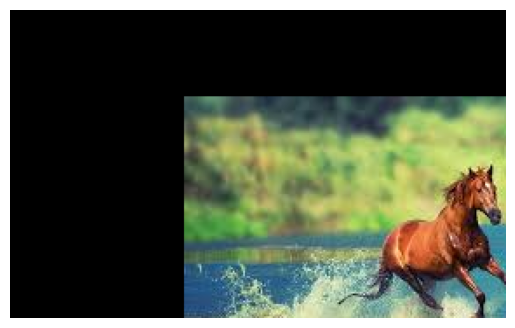

In [9]:
tx, ty = 100, 50
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
rows, cols = image.shape[:2]
translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
translated_image_rgb = cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB)
plt.imshow(translated_image_rgb)
plt.axis('off')
plt.show()


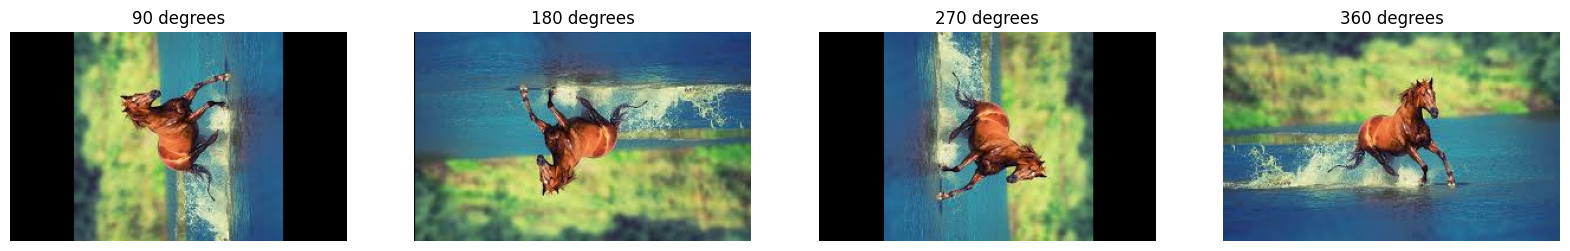

In [10]:
height, width = image.shape[:2]
center = (width / 2, height / 2)
angles = [90, 180, 270, 360]
fig, axes = plt.subplots(1, len(angles), figsize=(20, 5))

for i, angle in enumerate(angles):
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(rotated_image_rgb)
    axes[i].axis('off')
    axes[i].set_title(f'{angle} degrees')
plt.show()


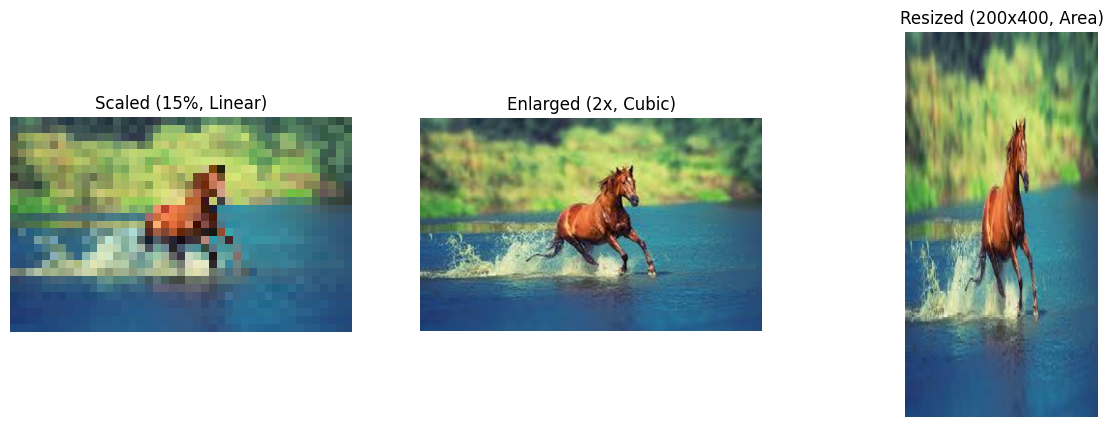

In [11]:
scaled_image = cv2.resize(image, None, fx=0.15, fy=0.15, interpolation=cv2.INTER_LINEAR)
enlarged_image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
resized_image = cv2.resize(image, (200, 400), interpolation=cv2.INTER_AREA)

scaled_image_rgb = cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB)
enlarged_image_rgb = cv2.cvtColor(enlarged_image, cv2.COLOR_BGR2RGB)
resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(scaled_image_rgb)
axes[0].set_title('Scaled (15%, Linear)')
axes[0].axis('off')

axes[1].imshow(enlarged_image_rgb)
axes[1].set_title('Enlarged (2x, Cubic)')
axes[1].axis('off')

axes[2].imshow(resized_image_rgb)
axes[2].set_title('Resized (200x400, Area)')
axes[2].axis('off')

plt.show()

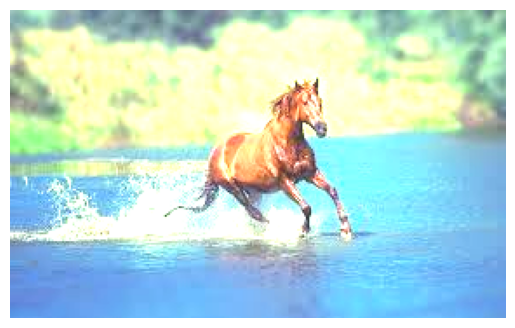

In [12]:
image_float32 = image.astype(np.float32)
alpha = 1.5
beta = 50
adjusted_image = cv2.convertScaleAbs(image_float32, alpha=alpha, beta=beta)
adjusted_image_rgb = cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2RGB)

plt.imshow(adjusted_image_rgb)
plt.axis('off')
plt.show()

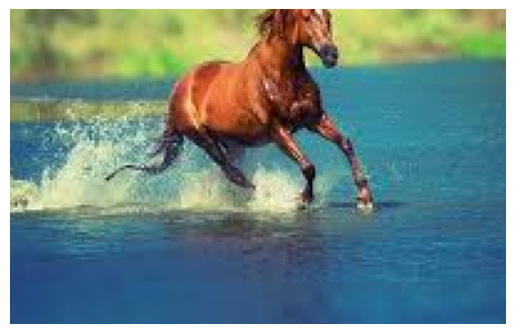

In [13]:
startY = 50
height = 200
startX = 50
width = 200

cropped_image = image[startY:startY + height, startX:startX + width]

cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

plt.imshow(cropped_image_rgb)
plt.axis('off')
plt.show()

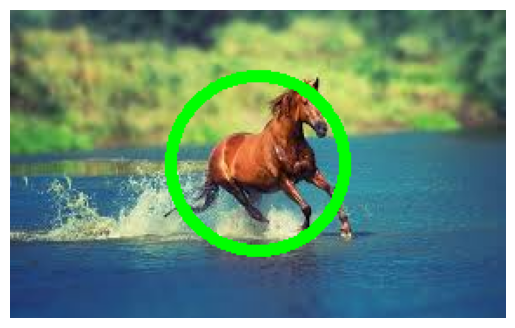

In [14]:
height, width = image.shape[:2]
center_x = width // 2
center_y = height // 2

cv2.circle(image, (center_x, center_y), radius=50, color=(0, 255, 0), thickness=5)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

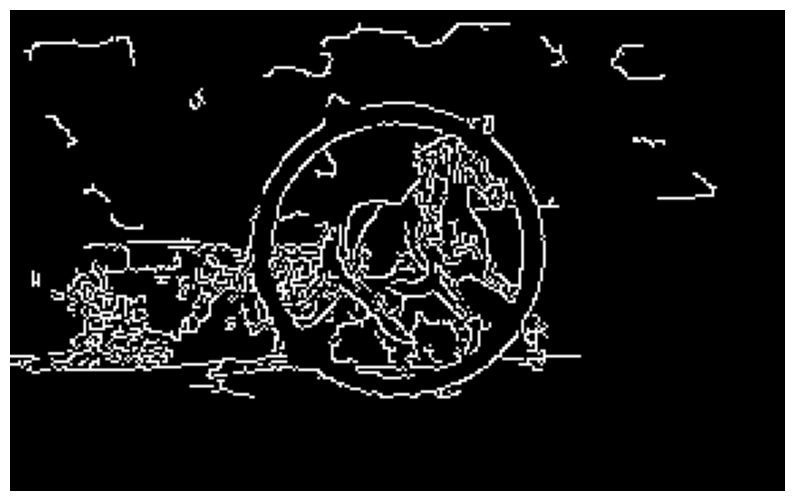

In [15]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

In [16]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error opening video stream or file")
    exit()
ret, prev_frame = cap.read()
if not ret:
    print("Cannot read frame from video stream")
    exit()
while True:
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    alpha = 1.5
    beta = 50
    adjusted_frame = cv2.convertScaleAbs(frame, alpha=alpha, beta=beta)

    blurred_frame = cv2.GaussianBlur(adjusted_frame, (5, 5), 0)
    gray_frame = cv2.cvtColor(blurred_frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_frame, threshold1=100, threshold2=200)

    diff = cv2.absdiff(gray_frame, cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY))
    _, motion_mask = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)

    adjusted_frame_rgb = cv2.cvtColor(adjusted_frame, cv2.COLOR_BGR2RGB)
    blurred_frame_rgb = cv2.cvtColor(blurred_frame, cv2.COLOR_BGR2RGB)

    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].imshow(adjusted_frame_rgb)
    axes[0].set_title('Enhanced')
    axes[0].axis('off')

    axes[1].imshow(blurred_frame_rgb)
    axes[1].set_title('Blurred')
    axes[1].axis('off')

    axes[2].imshow(edges, cmap='gray')
    axes[2].set_title('Edges')
    axes[2].axis('off')

    axes[3].imshow(motion_mask, cmap='gray')
    axes[3].set_title('Motion')
    axes[3].axis('off')

    plt.show()

    prev_frame = frame

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


Error opening video stream or file
Cannot read frame from video stream
Can't receive frame (stream end?). Exiting ...


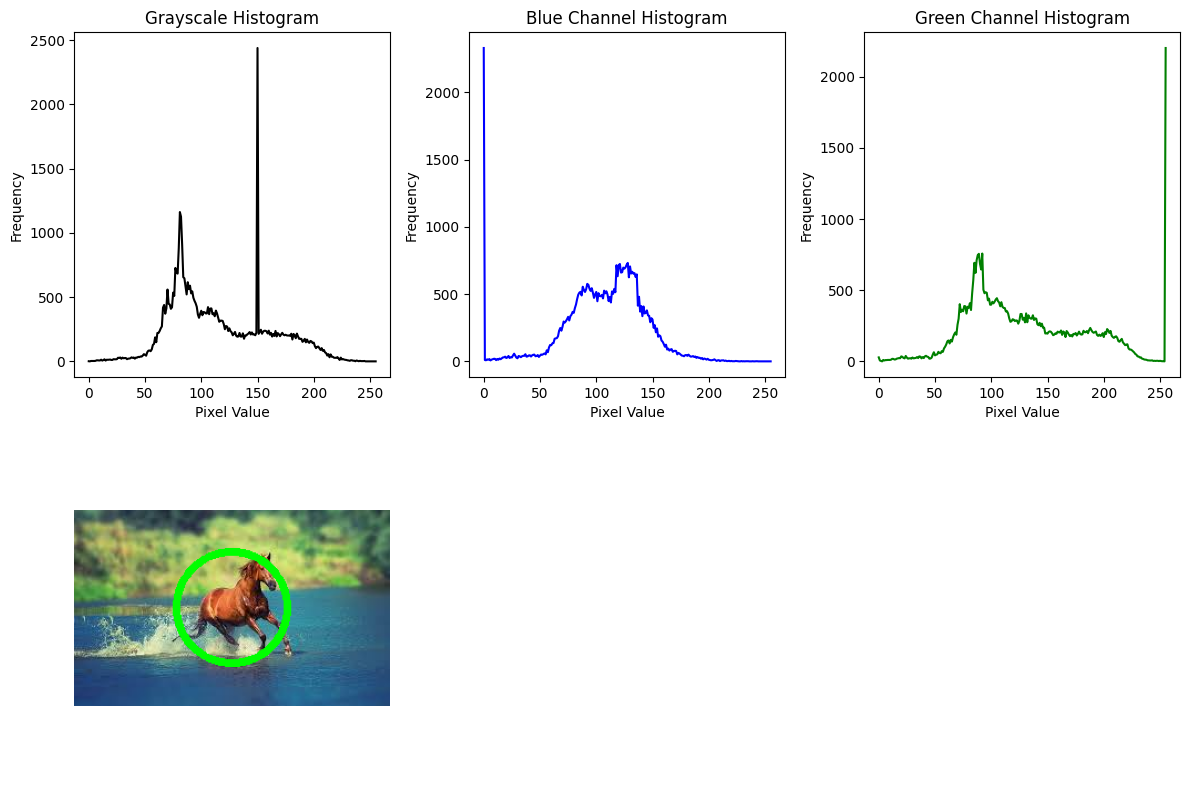

In [17]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray_hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
blue_hist = cv2.calcHist([image], [0], None, [256], [0, 256])
green_hist = cv2.calcHist([image], [1], None, [256], [0, 256])

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes[0, 0].plot(gray_hist, color='black')
axes[0, 0].set_title('Grayscale Histogram')
axes[0, 0].set_xlabel('Pixel Value')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].plot(blue_hist, color='blue')
axes[0, 1].set_title('Blue Channel Histogram')
axes[0, 1].set_xlabel('Pixel Value')
axes[0, 1].set_ylabel('Frequency')

axes[0, 2].plot(green_hist, color='green')
axes[0, 2].set_title('Green Channel Histogram')
axes[0, 2].set_xlabel('Pixel Value')
axes[0, 2].set_ylabel('Frequency')

axes[1, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[1, 0].axis('off')

for i in range(1, 3):
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

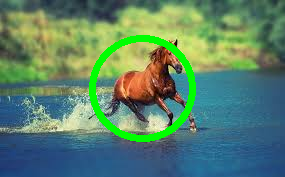

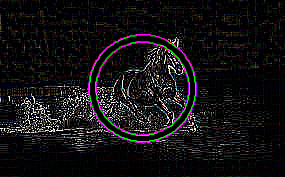

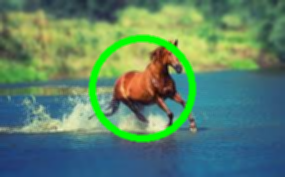

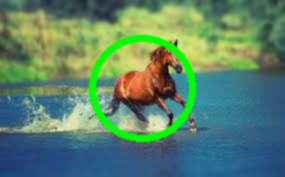

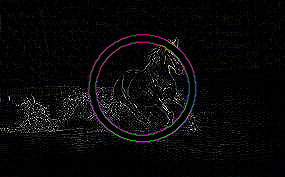

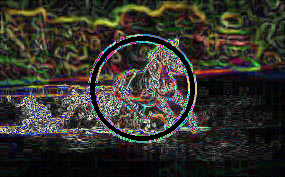

In [18]:
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])
filtered_image = cv2.filter2D(image, -1, kernel)

average_kernel = np.ones((3, 3), np.float32) / 9
gaussian_kernel = cv2.getGaussianKernel(3, 0)
gaussian_kernel = gaussian_kernel * gaussian_kernel.T
average_blur = cv2.filter2D(image, -1, average_kernel)
gaussian_blur = cv2.filter2D(image, -1, gaussian_kernel)

laplacian_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
sharpened_image = cv2.filter2D(image, -1, laplacian_kernel)

sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = cv2.magnitude(sobelx, sobely)

cv2_imshow(image)
cv2_imshow(filtered_image)
cv2_imshow(average_blur)
cv2_imshow(gaussian_blur)
cv2_imshow(sharpened_image)
cv2_imshow(sobel_edge.astype(np.uint8))

